<a href="https://colab.research.google.com/github/kimvongola/Self-Study-ML/blob/main/Self_Study_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=['fLength','fWidth', 'fSize','fConc','fConc1	','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)#read data in file and name the column
df.head()# apply name in the file

,fLength,fWidth,fSize,fConc,fConc1\t,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
# df['class'].unique # from pandas find unique data of the column 'class'->[g,h]
df['class']=(df['class']=='g').astype(int) # check if the data is g if true g==1 else ==0

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1\t,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


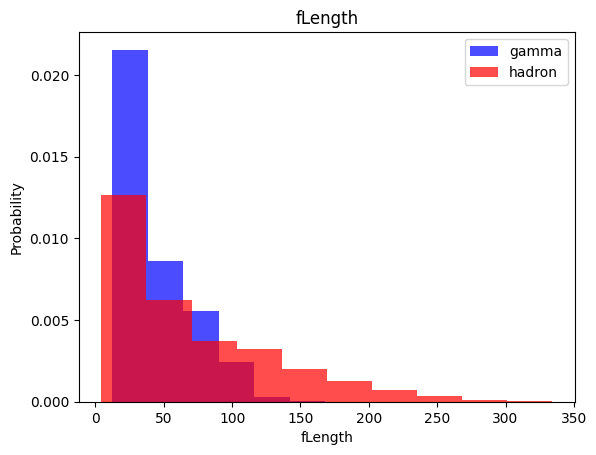

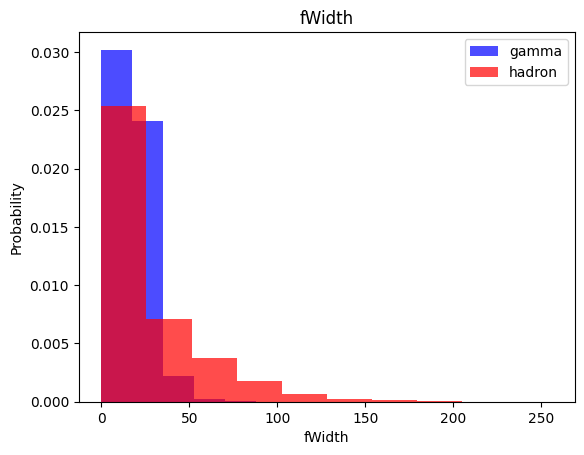

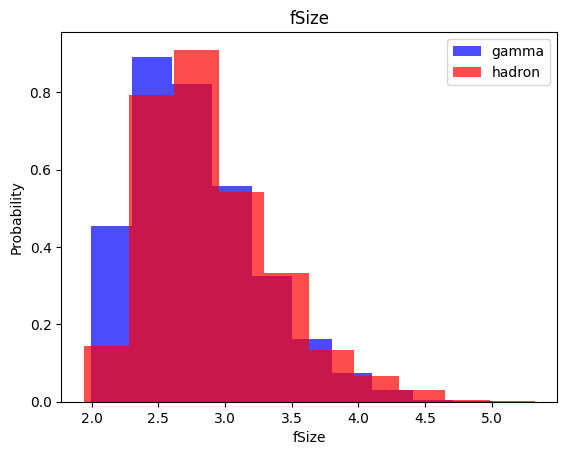

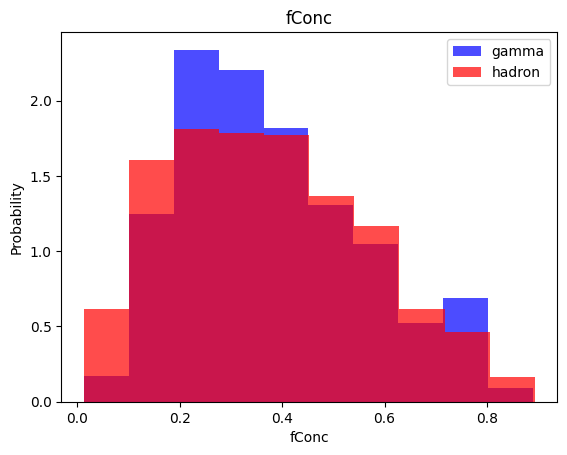

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


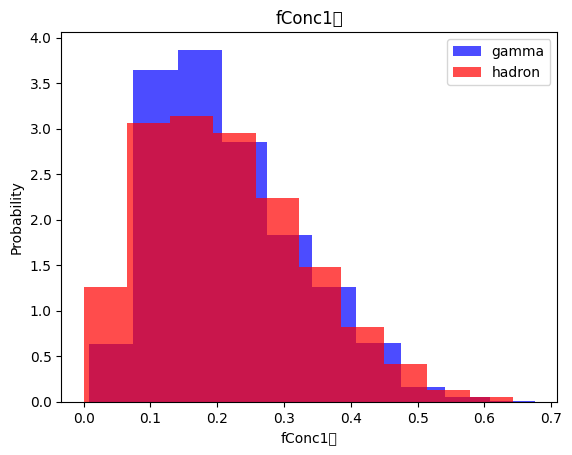

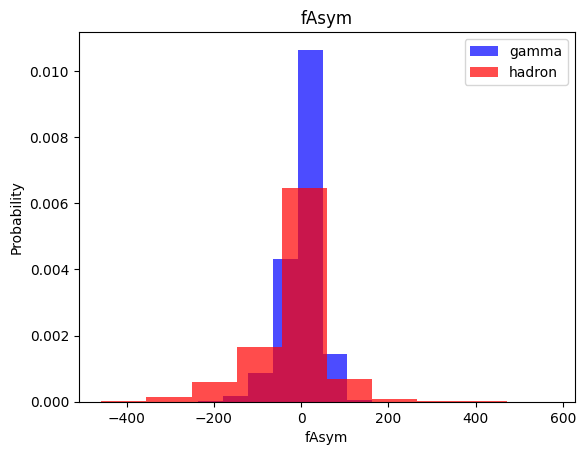

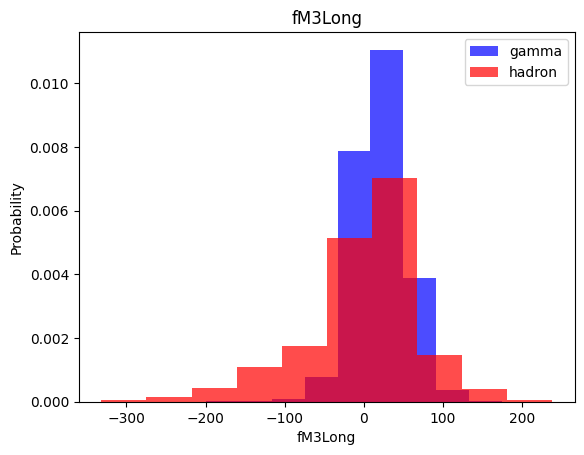

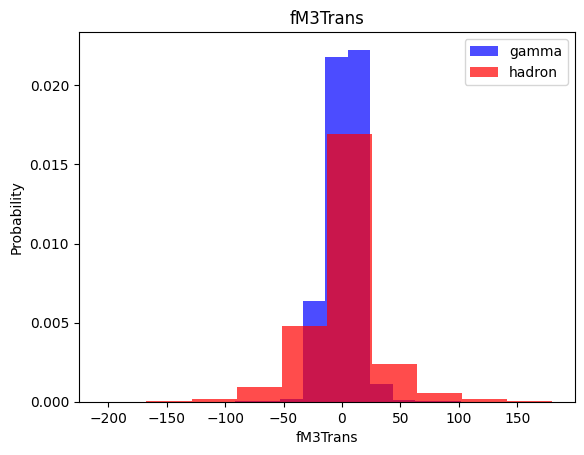

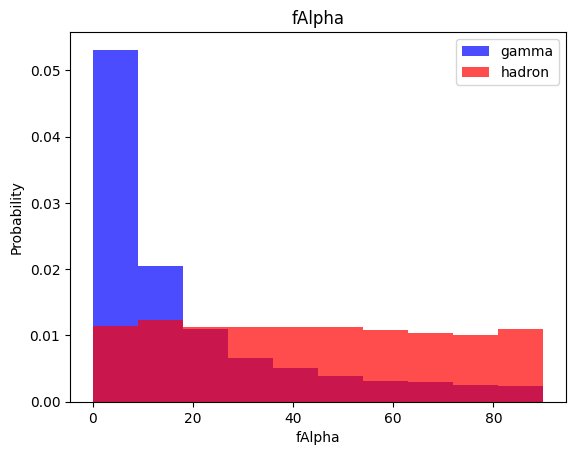

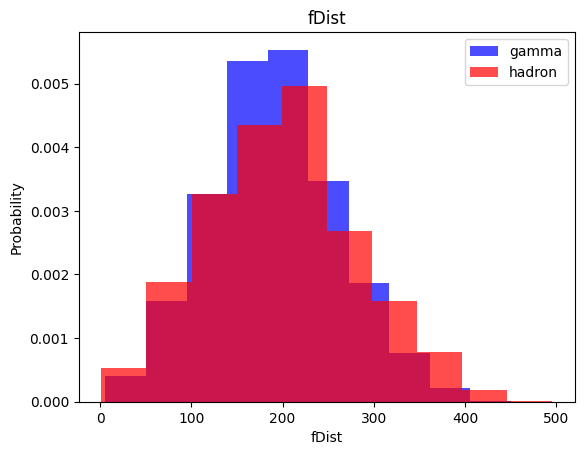

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True) #draw histogram of class result=1       alpha=transparency       density= True so the graph don't overlap each other
  plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()
  # Find the pattern of the histogram

# Train, Validation, Test dataset

In [ ]:
train, valid, test =np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))]) #shuffle the data and split them into <60% 60-80% 80-100%

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False): #scale the dataset into the same range #default of oversample =Flase
  X = dataframe[dataframe.columns[:-1]].values#The rest of dataset
  y = dataframe[dataframe.columns[-1]].values #'class'


  scaler=StandardScaler()
  X=scaler.fit_transform(X) #transform value into the same range as X

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y) #keep sampling from the less class so the size of the less class is the same the bigger class

  data=np.hstack((X,np.reshape(y,(-1,1)))) # stack them horizontally(side by side)

  return data,X,y

In [ ]:
# print(len(train[train['class']==1])) #gamma
# print(len(train[train['class']==0])) #hadron
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)#No value balancing
test, X_test, y_test = scale_dataset(test, oversample=False)#No value balancing

In [ ]:
# len(y_train)
# sum(y_train==1)
# sum(y_train==0)

# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred)) # presicion=how many correct predict in % |   recall=the amount I get from all the correct predict| f1=combination of presicion and recall

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1357
           1       0.86      0.87      0.86      2447

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [ ]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1357
           1       0.73      0.91      0.81      2447

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [ ]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1357
           1       0.84      0.83      0.83      2447

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()
svc_model=svc_model.fit(X_train,y_train)

In [ ]:
y_pred=svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1357
           1       0.88      0.91      0.89      2447

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Error')
  ax1.legend()
  ax1.grid(True)
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()
# def plot_accuracy(history):
#   plt.plot(history.history['accuracy'],label='accuracy')
#   plt.plot(history.history['val_accuracy'],label='val_accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

In [ ]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),#stop training random node in random iteration
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),#stop training random node in random iteration
      tf.keras.layers.Dense(1,activation='sigmoid'),
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


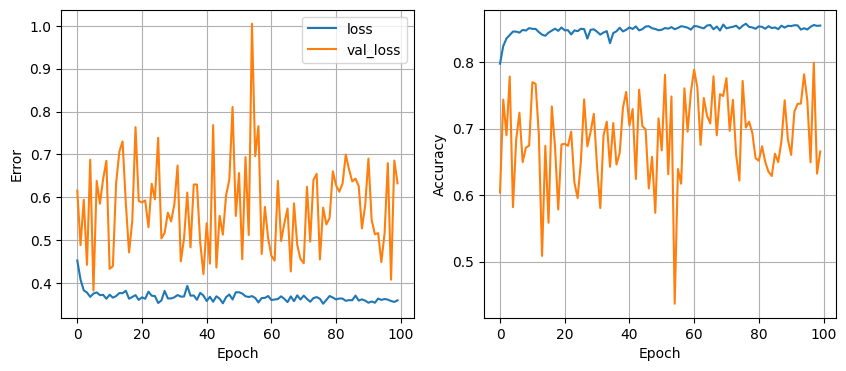

119/119 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8594
16 nodes, dropout 0, lr 0.1, batch size 64


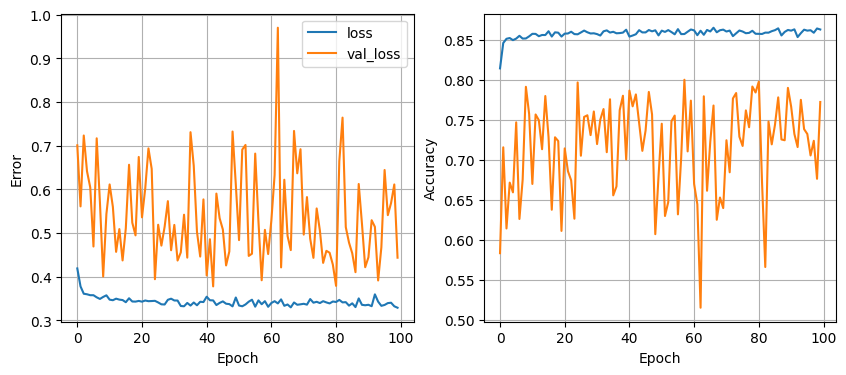

119/119 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.1, batch size 128


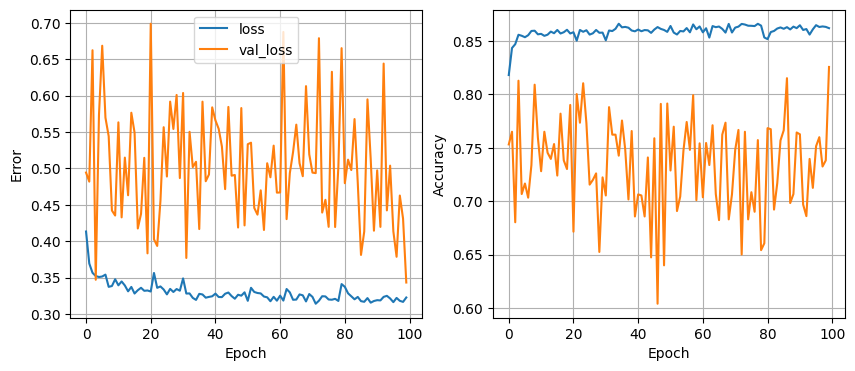

119/119 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8475
16 nodes, dropout 0, lr 0.05, batch size 32


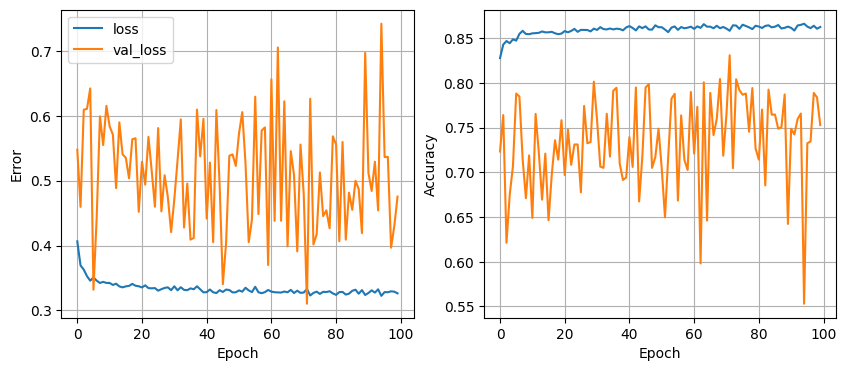

119/119 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8607
16 nodes, dropout 0, lr 0.05, batch size 64


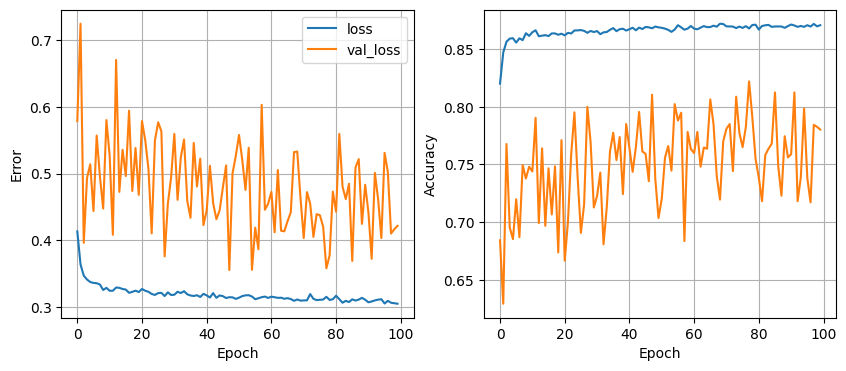

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.05, batch size 128


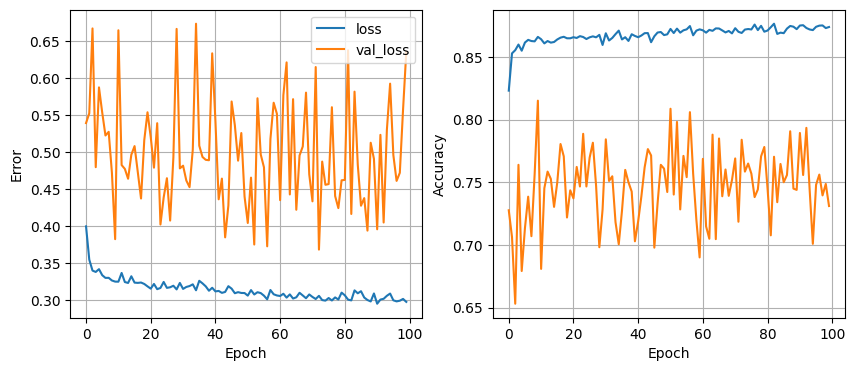

119/119 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.01, batch size 32


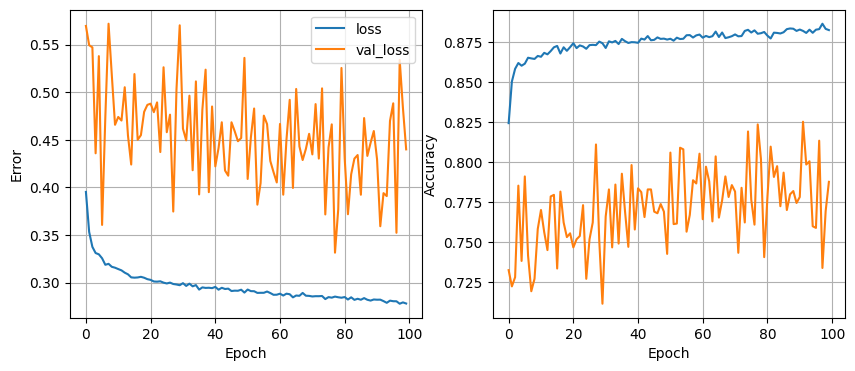

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.01, batch size 64


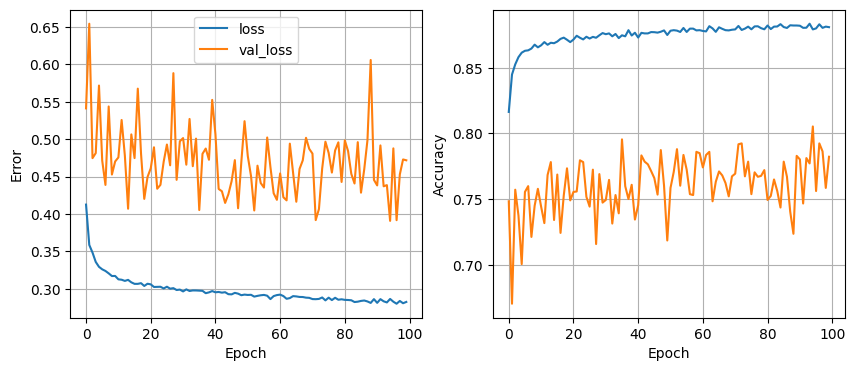

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.01, batch size 128


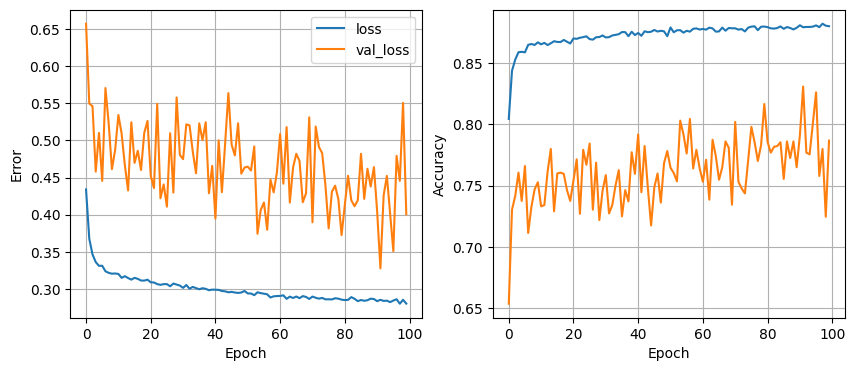

119/119 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8793
16 nodes, dropout 0.2, lr 0.1, batch size 32


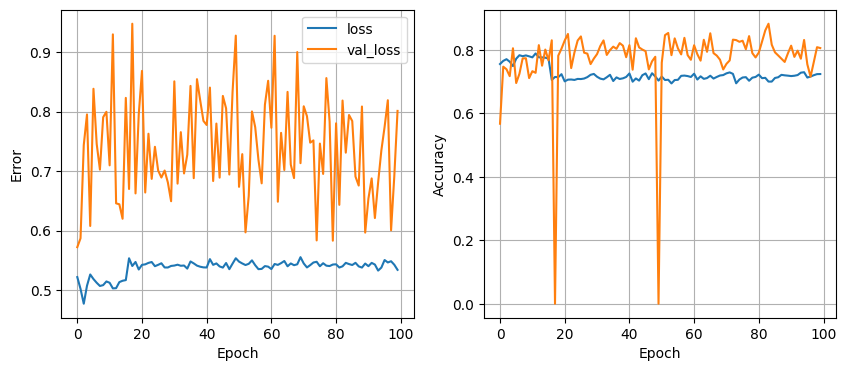

119/119 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.8120
16 nodes, dropout 0.2, lr 0.1, batch size 64


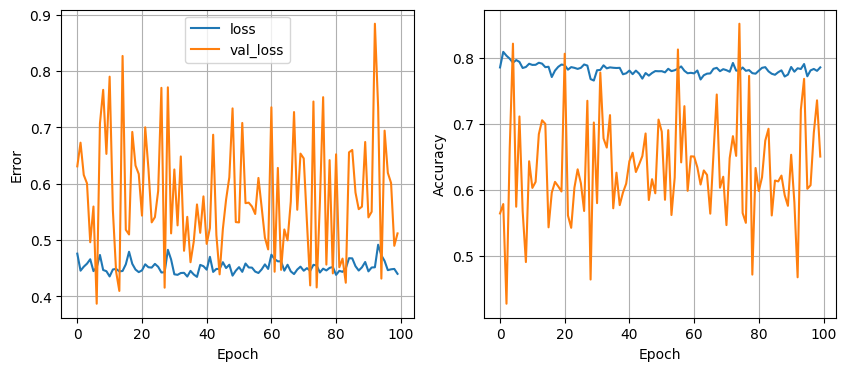

119/119 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8541
16 nodes, dropout 0.2, lr 0.1, batch size 128


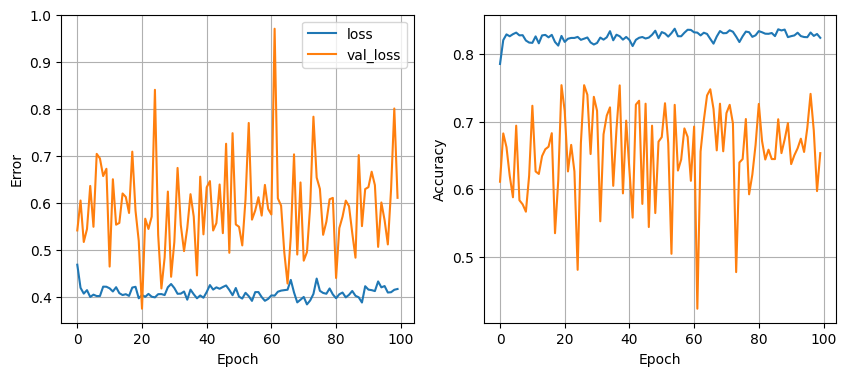

119/119 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8515
16 nodes, dropout 0.2, lr 0.05, batch size 32


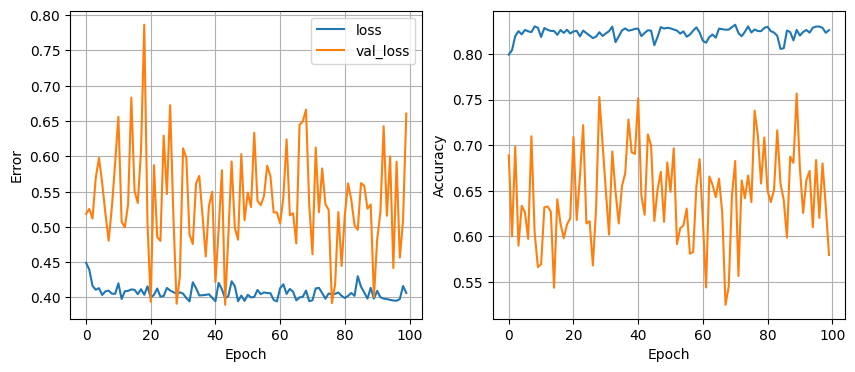

119/119 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8465
16 nodes, dropout 0.2, lr 0.05, batch size 64


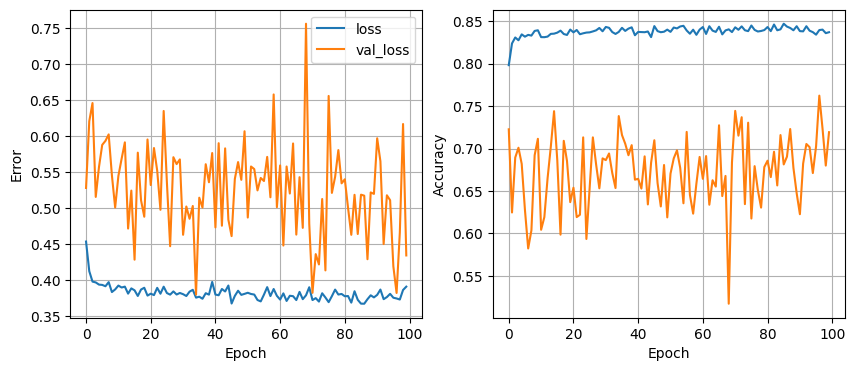

119/119 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8509
16 nodes, dropout 0.2, lr 0.05, batch size 128


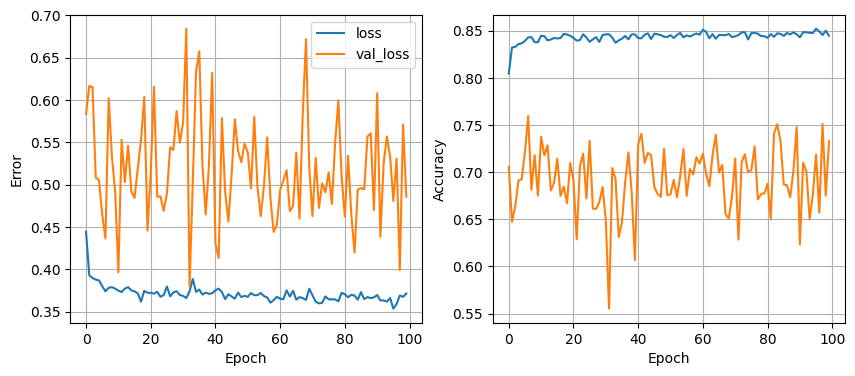

119/119 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch size 32


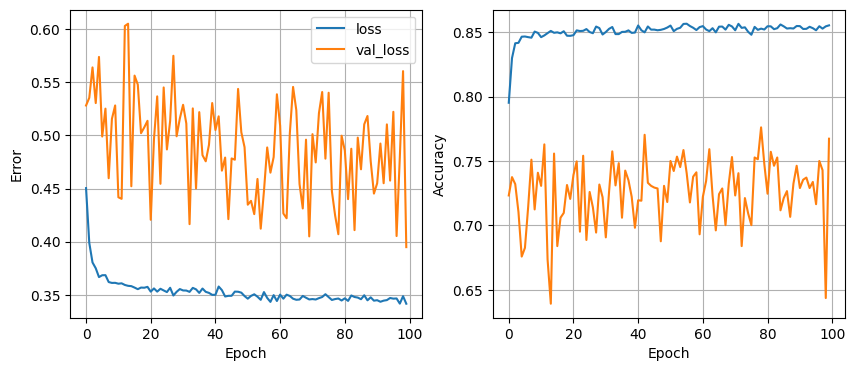

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.01, batch size 64


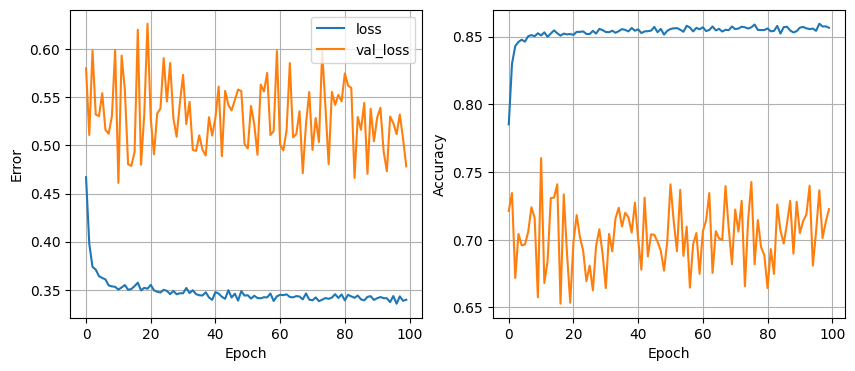

119/119 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.01, batch size 128


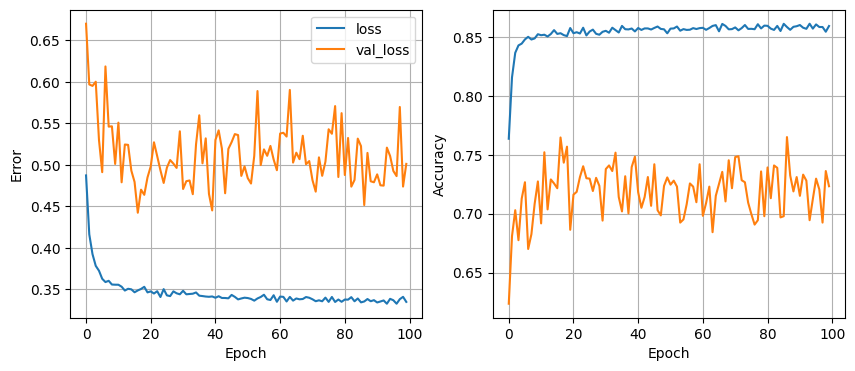

119/119 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.1, batch size 32


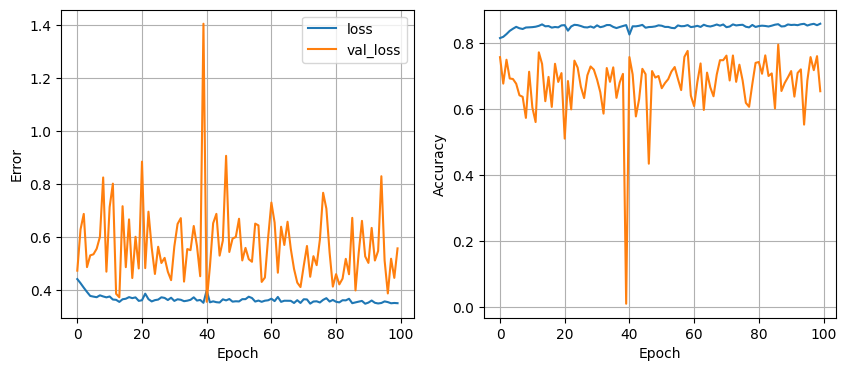

119/119 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8588
32 nodes, dropout 0, lr 0.1, batch size 64


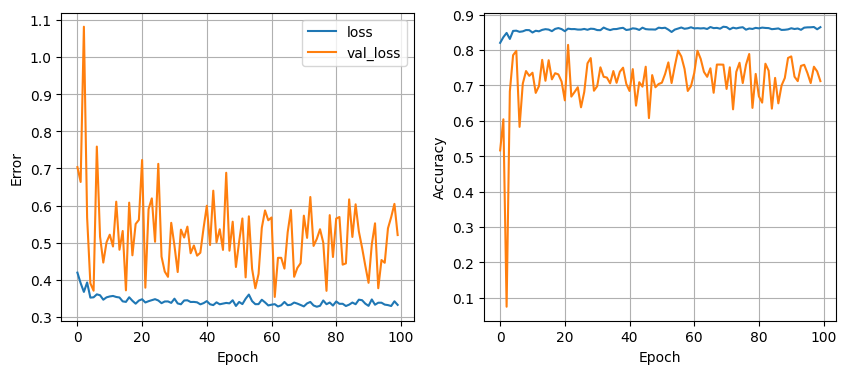

119/119 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.1, batch size 128


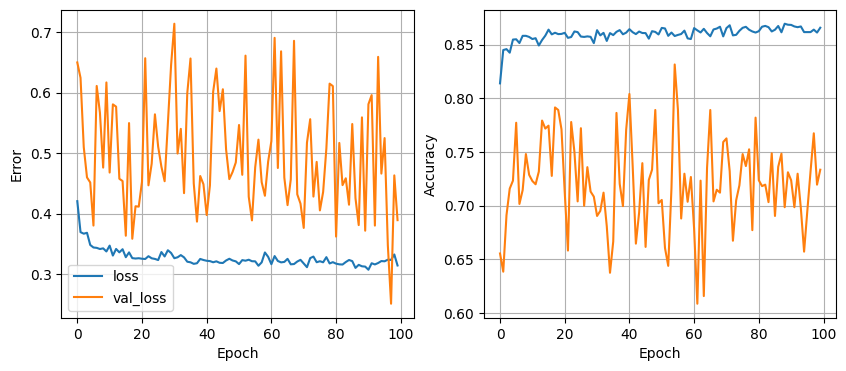

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.05, batch size 32


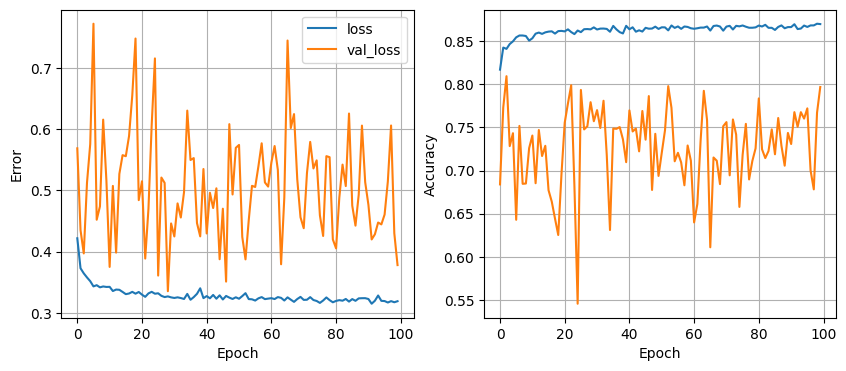

119/119 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.05, batch size 64


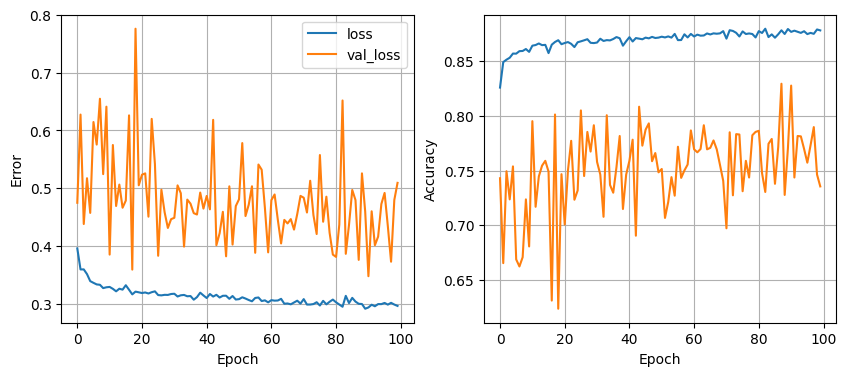

119/119 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.05, batch size 128


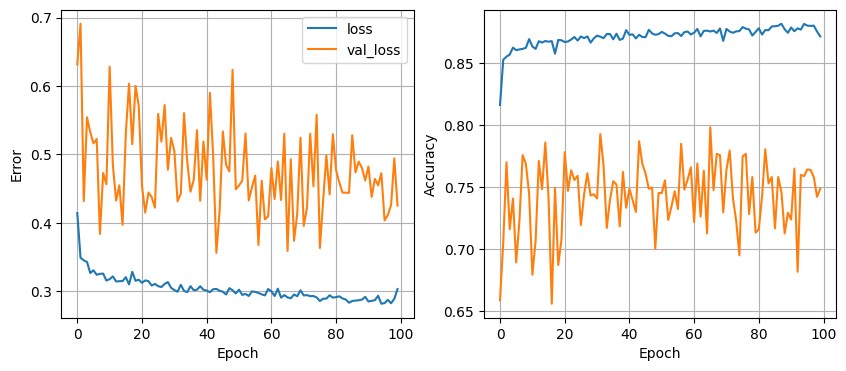

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8746
32 nodes, dropout 0, lr 0.01, batch size 32


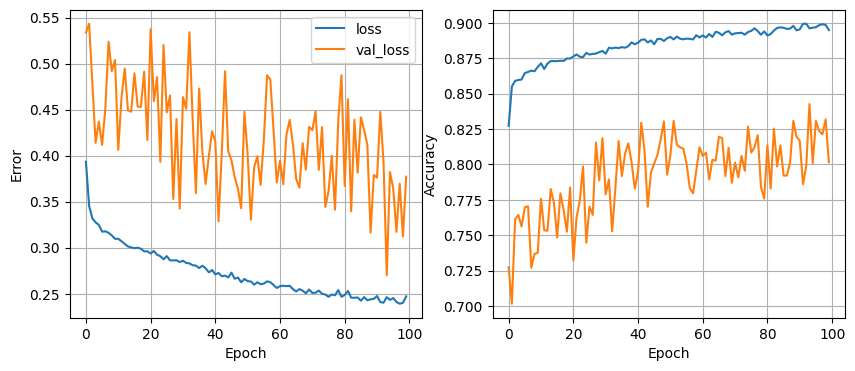

119/119 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch size 64


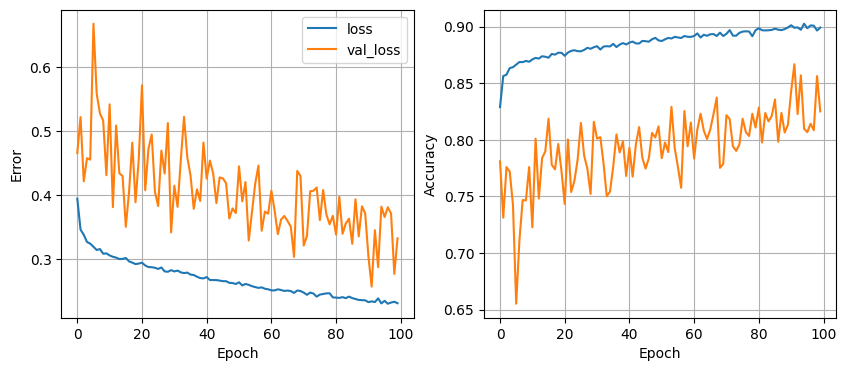

119/119 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.01, batch size 128


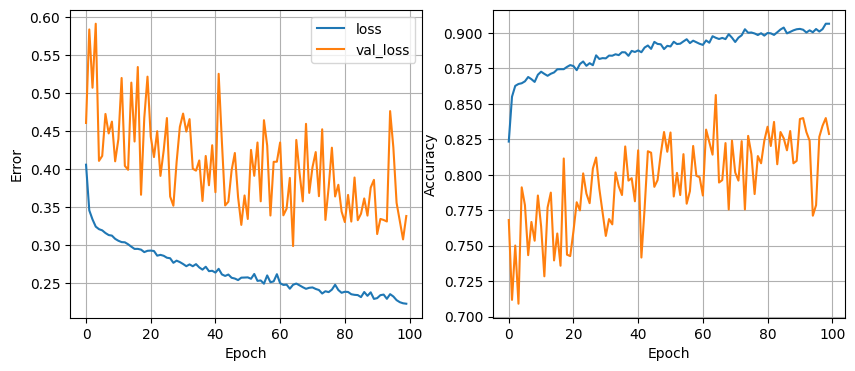

119/119 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.1, batch size 32


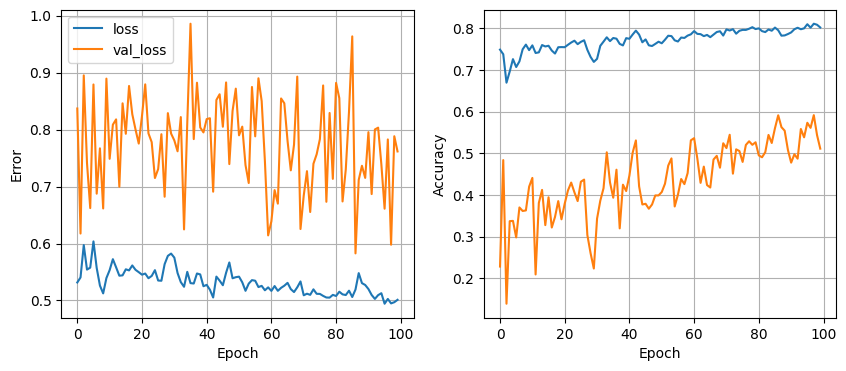

119/119 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8236
32 nodes, dropout 0.2, lr 0.1, batch size 64


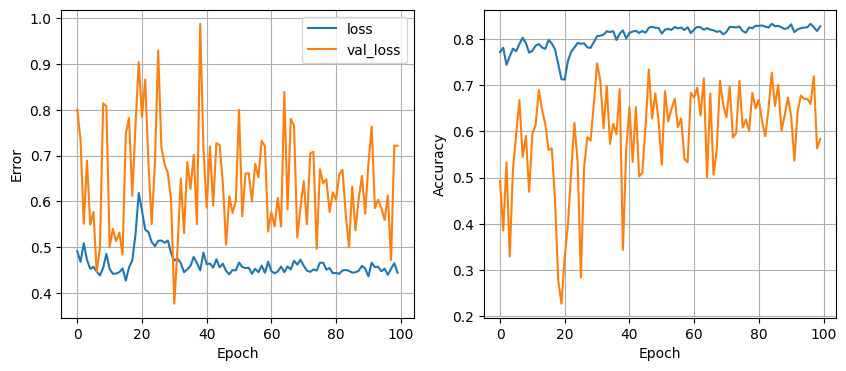

119/119 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8407
32 nodes, dropout 0.2, lr 0.1, batch size 128


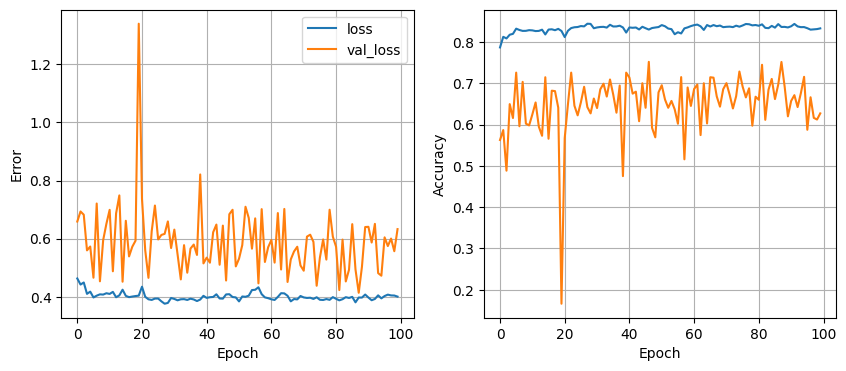

119/119 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8478
32 nodes, dropout 0.2, lr 0.05, batch size 32


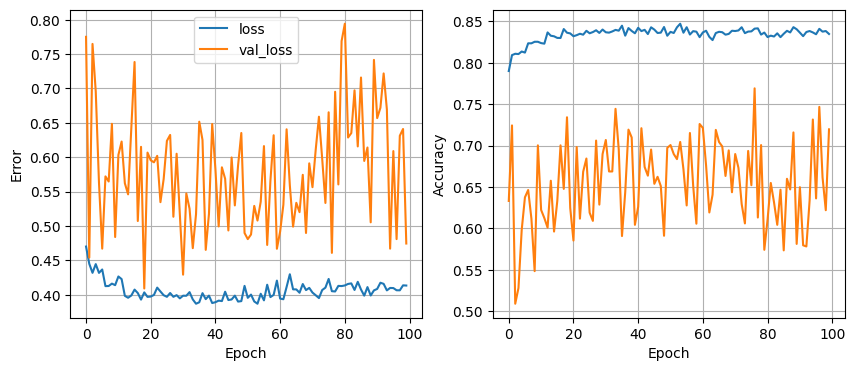

119/119 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8567
32 nodes, dropout 0.2, lr 0.05, batch size 64


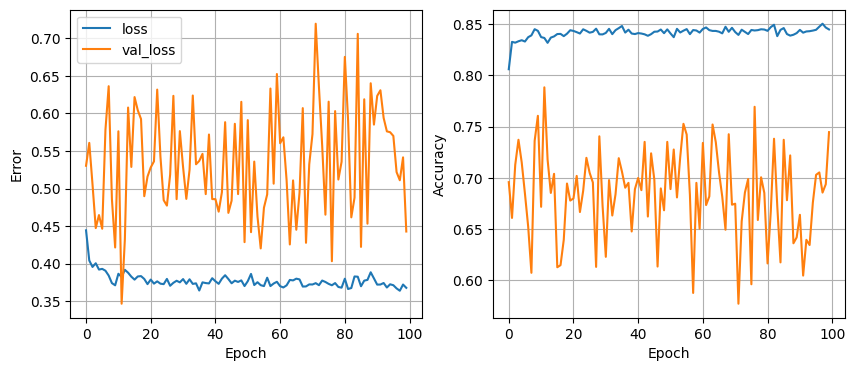

119/119 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8609
32 nodes, dropout 0.2, lr 0.05, batch size 128


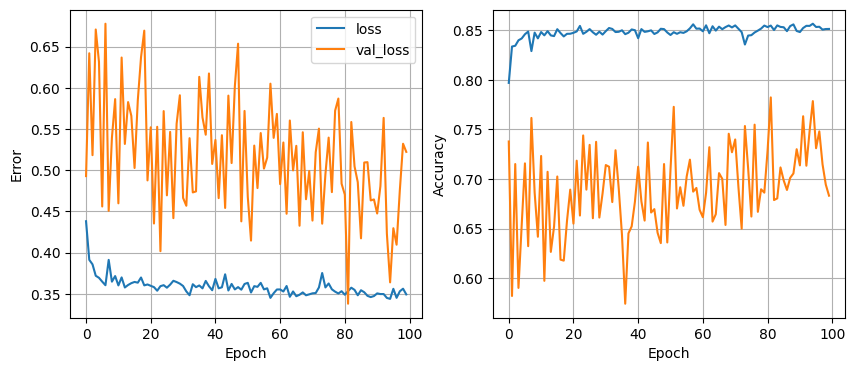

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8654
32 nodes, dropout 0.2, lr 0.01, batch size 32


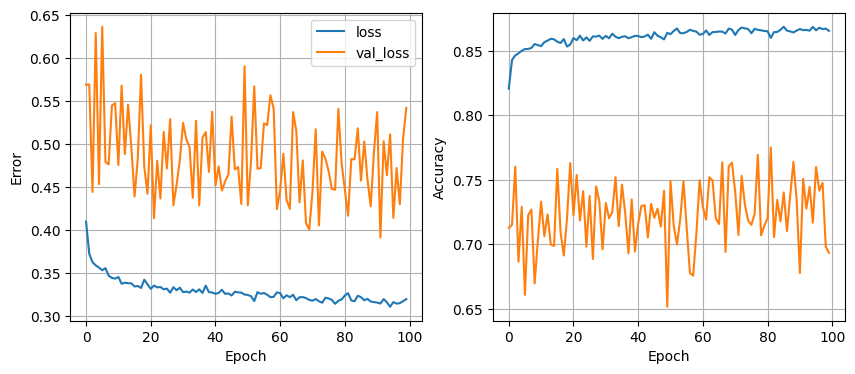

119/119 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.01, batch size 64


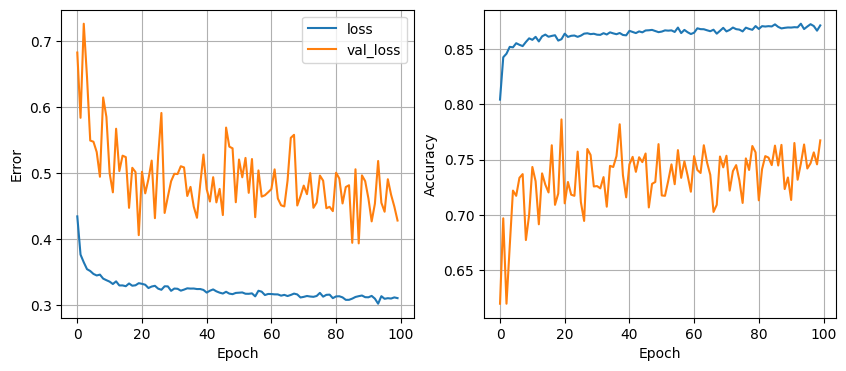

119/119 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.01, batch size 128


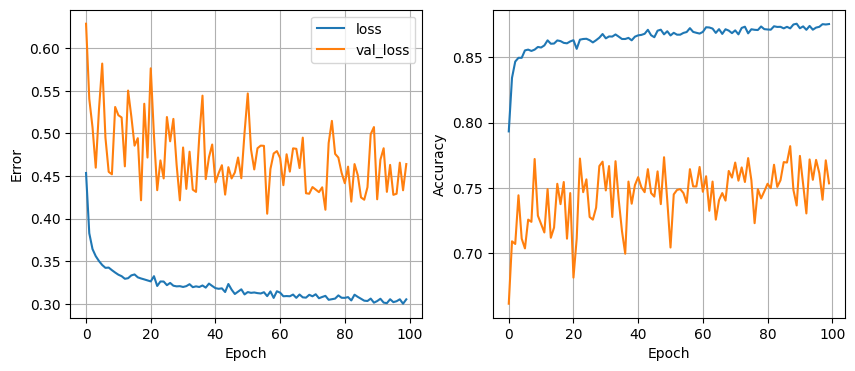

119/119 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.8749
64 nodes, dropout 0, lr 0.1, batch size 32


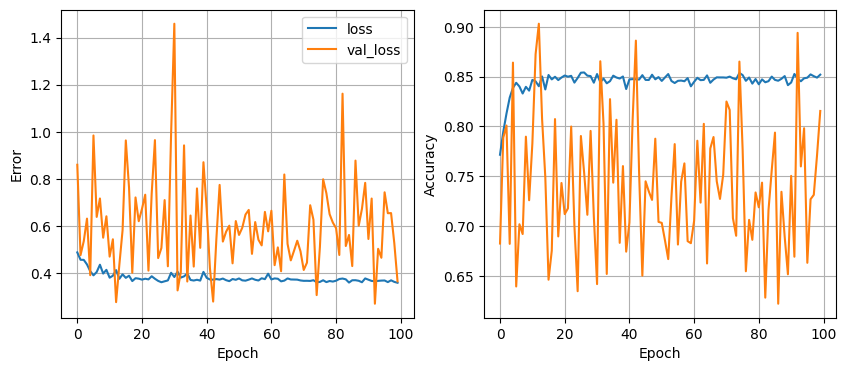

119/119 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8454
64 nodes, dropout 0, lr 0.1, batch size 64


In [ ]:
least_val_loss=float('inf')
least_val_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1,0.05,0.01]:
      for batch_size in [32,64,128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(history)
        val_loss=model.evaluate(X_valid,y_valid)[0]
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_val_model=model


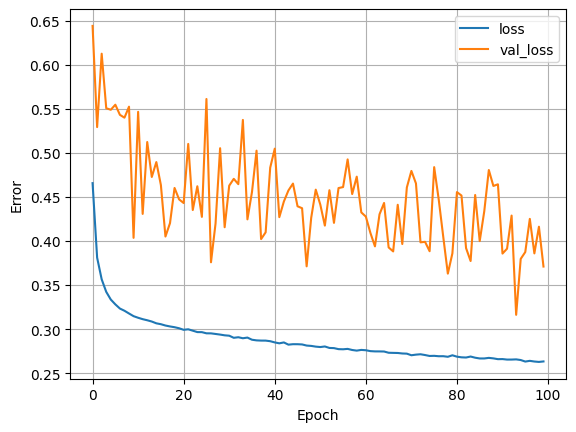

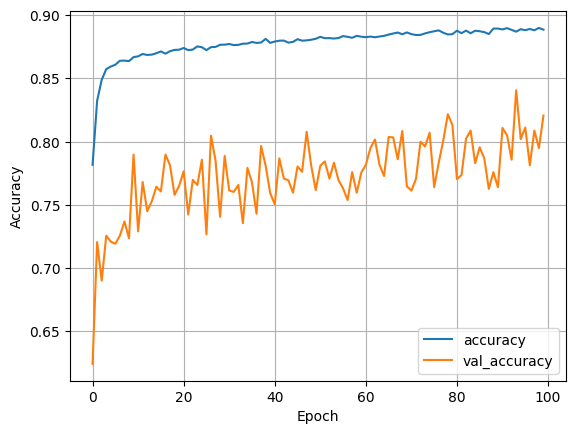

In [ ]:
# plot_loss(history)
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred  >0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred)